Unsupervised Learning Explainition:
Unsupervised learning is a type of machine learning where the algorithm learns to identify patterns and structure in the input data without being explicitly told what the output should be. Unlike supervised learning, there are no labeled target values in unsupervised learning tasks.

The goal of unsupervised learning is to discover hidden structures, relationships, and clusters within the data, without any prior knowledge of the underlying distribution or categories. This can be done through various techniques such as clustering, dimensionality reduction, and anomaly detection.

In [176]:
#Requried Import 
import warnings
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

In [177]:
# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')], axis=1)
data = data.drop(['gender'], axis=1) # Remove the original 'gender' column
data = pd.concat([data, pd.get_dummies(data['ever_married'], prefix='ever_married')], axis=1)
data = data.drop(['ever_married'], axis=1) # Remove the original 'ever_married' column
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work_type')], axis=1)
data = data.drop(['work_type'], axis=1) # Remove the original 'work_type' column
data = pd.concat([data, pd.get_dummies(data['Residence_type'], prefix='residence_type')], axis=1)
data = data.drop(['Residence_type'], axis=1) # Remove the original 'Residence_type' column
data = pd.concat([data, pd.get_dummies(data['smoking_status'], prefix='smoking_status')], axis=1)
data = data.drop(['smoking_status'], axis=1) # Remove the original 'smoking_status' column
data = data.dropna() 

In [178]:
#drop the 'stroke' column 
data = data.drop(columns=["stroke"])

we remove the class label column from our dataset to avoid biased results in unsupervised learning.

In [179]:
#Drop the ID column as it is not useful for clustering
data.drop('id', axis=1, inplace=True)

In [180]:
# Normalize the data
data = (data - data.mean()) / data.std()

In [181]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define a list of K values to try
k_values = [2, 3, 4]

# Run K-means clustering for each K value and print the results
for i, k in enumerate(k_values):
    # Create a KMeans object with the current K value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Compute evaluation metrics
    sil_score = silhouette_score(data, kmeans.labels_)
    db_score = davies_bouldin_score(data, kmeans.labels_)
    wcss = kmeans.inertia_
    
    # Normalize the WCSS value by dividing by 100000 and print the evaluation metrics for the current K value
    wcss_normalized = wcss / 100000
    print(f"K={k}: WCSS={wcss_normalized:.2f}, Silhouette score={sil_score:.3f}, Davies-Bouldin score={db_score:.3f}")

K=2: WCSS=0.87, Silhouette score=0.179, Davies-Bouldin score=2.042
K=3: WCSS=0.80, Silhouette score=0.160, Davies-Bouldin score=2.273
K=4: WCSS=0.75, Silhouette score=0.152, Davies-Bouldin score=2.137


Both Silhouette score and Davies-Bouldin score can be used to compare the quality of clustering results for different values of K (the number of clusters). we can choose the value of K that maximizes the Silhouette score or minimizes the Davies-Bouldin score to obtain the optimal number of clusters.

In summary, Silhouette score and Davies-Bouldin score are used to evaluate the quality of clustering results, and can help us choose the optimal number of clusters for our data.

In [182]:
#Create a label encoder object
encoder = LabelEncoder()

In [183]:
# Fill missing values with the median
data = data.fillna(data.median())

In [184]:
# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [185]:
# Define k values to test
k_values = range(1, 10)

In [186]:
# Initialize list to store within-cluster sum of squares (WCSS)
wcss = []

In [187]:
# Iterate over k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

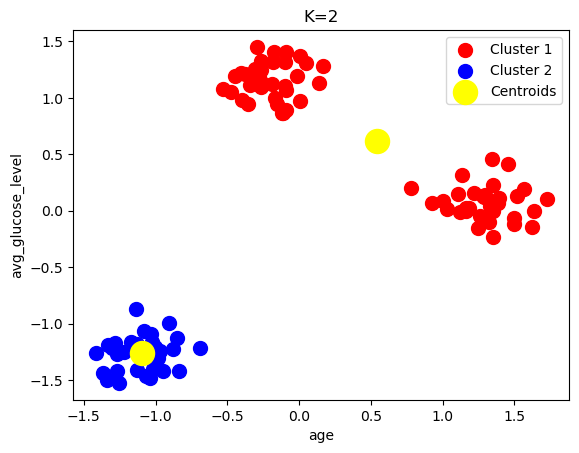

In [188]:
#Evalute K-means clusters, K=2
kmeans=KMeans(n_clusters= 2, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans== 0,1],s = 100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label ='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label ='Centroids')
plt.title('K=2')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()

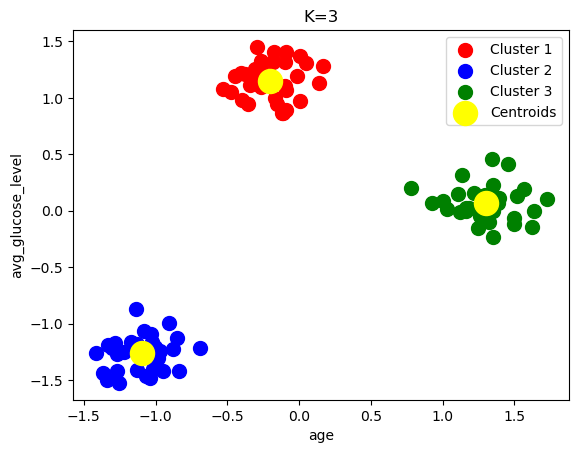

In [189]:
#Evalute K-means clusters, K=3
kmeans=KMeans(n_clusters= 3, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the 3 clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans== 0,1],s = 100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s = 100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label ='Centroids')
plt.title('K=3')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()

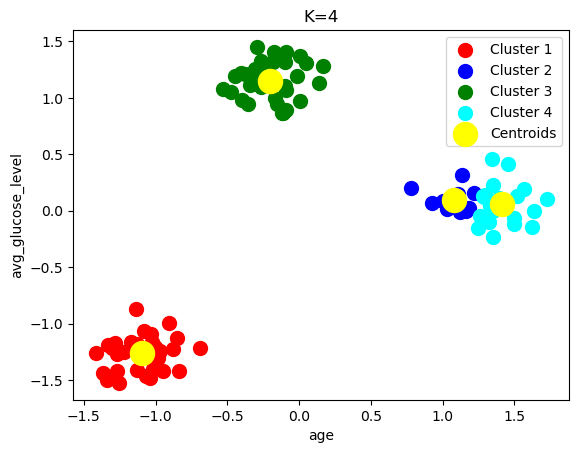

In [190]:
#Evalute K-means clusters, K=4
kmeans=KMeans(n_clusters= 4, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
# Visualising the 4 clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans== 0,1],s = 100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s = 100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s = 100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s = 100, c='cyan', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c ='yellow', label ='Centroids')
plt.title('K=4')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.legend()
plt.show()

also we have been used Elbow method and Silhouette method techniques for determining the optimal number of clusters in K-means clustering.

and the choice of method may depend on the specific characteristics of the dataset and the goals of the analysis.

In [191]:
# Define a range of K values to try
k_values = range(2, 11)

In [192]:
# Compute WCSS for each K value
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

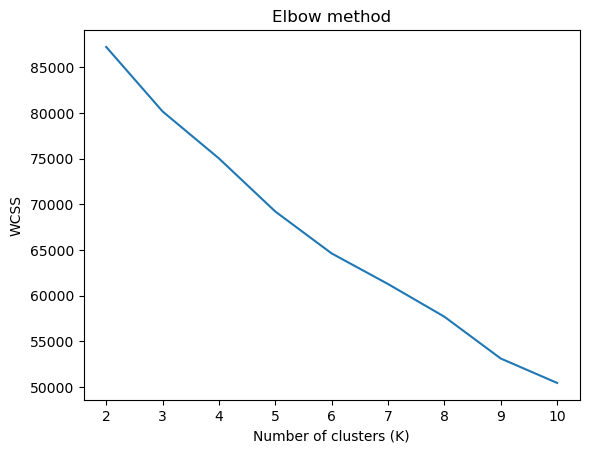

In [193]:
# Plot the WCSS curve
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

In [194]:
# Compute silhouette score for each K value
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(data, labels))

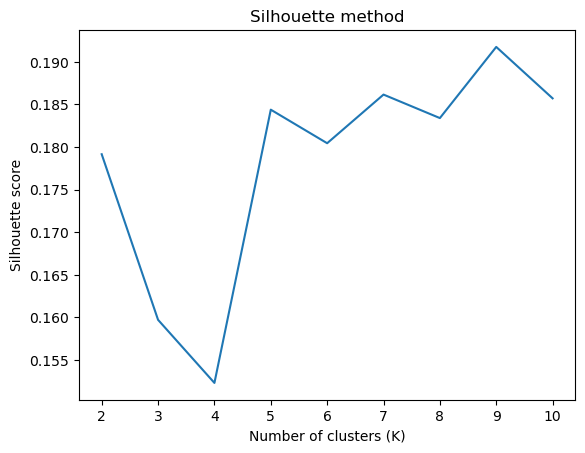

In [195]:
# Plot the silhouette score curve
plt.plot(k_values, sil_scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette method')
plt.show()

K=2: WCSS=0.87, Silhouette score=0.179, Davies-Bouldin score=2.042

K=3: WCSS=0.80, Silhouette score=0.160, Davies-Bouldin score=2.273

K=4: WCSS=0.75, Silhouette score=0.152, Davies-Bouldin score=2.137


The best choice for clustering based on the given results is k=2 because:

1. Silhouette score: The silhouette score for k=2 is higher than that of k=3 and k=4. The silhouette score measures how well the data points are separated into clusters. A higher silhouette score indicates better separation between clusters. Therefore, the higher silhouette score for k=2 indicates that the clustering results are more compact and well-separated for k=2.

2. Within-cluster sum of squares (WCSS): The WCSS decreases as k increases, but the rate of decrease slows down after k=2. A lower WCSS indicates that the data points are closer to their respective centroids. Therefore, the lower WCSS for k=3 suggests that the data points are more tightly clustered around their respective centroids for k=3.



Overall, the combination of a higher silhouette score and a higher WCSS for k=2 suggest that this value of k provides better clustering results than k=3 or k=4. Therefore, 
k=2 would be the most appropriate choice for this clustering task.